In [1]:
import pandas as pd
import sys
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import ipywidgets as widgets
import sqlite3 as sql

In [2]:
df = pd.read_csv("Reporte.csv", header=None, names=["Fecha", "Fuente_llamada", "Grupo_Timbrado","Destino_llamada","Canal_Origen","Codigo_Cuenta","Canal_Destino","Estado_llamada","Duracion","Varios"] , encoding='latin-1')
#df

/Users/crismajovi/Desktop/Obtencion y Limpieza de Datos/Entornos Virtuales/env07/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (1,2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
colum=['Grupo_Timbrado','Codigo_Cuenta','Varios']
df=df.drop(colum,1)
df=df.drop(labels=[0], axis=0)

In [4]:
df
#df.dtypes
#df.keys(

,Fecha,Fuente_llamada,Destino_llamada,Canal_Origen,Canal_Destino,Estado_llamada,Duracion
1,2018-09-04 16:42:19,1001,s,SIP/1001-0000053d,NaN,ANSWERED,32s
2,2018-09-04 16:30:33,413,0994439133,SIP/413-0000053b,SIP/1001-0000053c,ANSWERED,125s (2m 5s)
3,2018-09-04 16:27:34,418,0991933595,SIP/418-00000539,SIP/1001-0000053a,BUSY,0s
4,2018-09-04 16:27:22,0994439133,420,Local/420@from-internal-0000003d;2,SIP/420-00000538,ANSWERED,10s
5,2018-09-04 16:26:55,0994439133,413,SIP/1001-00000536,Local/420@from-internal-0000003d;1,ANSWERED,39s
6,2018-09-04 16:25:36,413,0994439133,SIP/413-00000534,SIP/1001-00000535,NO ANSWER,0s
7,2018-09-04 16:14:04,412,0997885414,SIP/412-00000532,SIP/1001-00000533,ANSWERED,30s
8,2018-09-04 16:08:17,413,0996922067,Local/0996922067@from-internal-0000003c;2,SIP/1001-00000531,NO ANSWER,0s
9,2018-09-04 16:07:53,413,416,SIP/413-0000052f,SIP/416-00000530,NO ANSWER,0s
10,2018-09-04 15:45:53,0994439133,413,SIP/1001-0000052d,SIP/413-0000052e,ANSWERED,47s


In [5]:
#df.Destino_llamada

In [6]:
data=df
lista=['s','unknown','i','Anonymous','t','pbdirectory','hangup','en'] 
data2=['Fuente_llamada','Destino_llamada']
data['Fuente_llamada'] = data['Fuente_llamada'].str.replace("*", "")
data['Destino_llamada'] = data['Destino_llamada'].str.replace("*", "")
data['Fuente_llamada'] = data['Fuente_llamada'].str.replace("-", "")
data['Destino_llamada'] = data['Destino_llamada'].str.replace("-", "")
data[data2]=data[data2].replace(lista,"0")
#data[data2]= data[data2].astype(int)

In [7]:
data.Fuente_llamada = data.Fuente_llamada.fillna(0).astype(int) 
data.Destino_llamada = data.Destino_llamada.fillna(0).astype(int)


In [8]:
#data.Fuente_llamada
#lista=['SIP/413-0000053b','SIP/418-00000539','SIP/413-00000534','SIP/412-00000532','SIP/416-0000052b','SIP/413-0000052f']
#data['Canal_Origen'] = data['Canal_Origen'].replace(lista, "Extension")


In [9]:
data6 = pd.DataFrame({'Fuente_llamada': ['301', '400', '401', '403','406', '409', '412', '413','414','415','416','418','419','420',
                                        '425','435','436','437','438','503','504','505'],
	'Usuario': ['Soporte', 'Edison Macas', 'Karina Lima', 'David Calva','Fernando Regalado', 'Edison Macas', 'Jaime Landazuri', 
                'Edwin Aguilar','Angel Cuenca','Marco Muñoz','Daniela Guerrero','Cristian Villamagua','Ramiro Roman','Jose Arevalo',
               'Agusto Castro','Eliana Lizaldes','Daniel Jimenez','Soporte','Soporte','Soporte Internet','Soporte Internet2','Ventas'],
	'Departamento': ['Internet', 'Gerencia', 'Contabilidad', 'Recaudacion','Diseño', 'Gerencia', 'Software', 'Departamento Tecnico',
                     'Software','Bodega','Almacen','Redes','Departamento Tecnico','Electronica',
                    'Almacen','Gerencia','Software','Software','Software','Internet','Internet','Almacen']})
data6.Fuente_llamada = data6.Fuente_llamada.fillna(0).astype(int) 


In [10]:
data6

,Departamento,Fuente_llamada,Usuario
0,Internet,301,Soporte
1,Gerencia,400,Edison Macas
2,Contabilidad,401,Karina Lima
3,Recaudacion,403,David Calva
4,Diseño,406,Fernando Regalado
5,Gerencia,409,Edison Macas
6,Software,412,Jaime Landazuri
7,Departamento Tecnico,413,Edwin Aguilar
8,Software,414,Angel Cuenca
9,Bodega,415,Marco Muñoz


In [11]:
data6.Fuente_llamada = data6.Fuente_llamada.fillna(0).astype(int) 

In [12]:
result = pd.merge(data, data6, on='Fuente_llamada')
result['Anio'] = pd.DatetimeIndex(result['Fecha']).year
result['MES'] = pd.DatetimeIndex(result['Fecha']).month
result


,Fecha,Fuente_llamada,Destino_llamada,Canal_Origen,Canal_Destino,Estado_llamada,Duracion,Departamento,Usuario,Anio,MES
0,2018-09-04 16:30:33,413,994439133,SIP/413-0000053b,SIP/1001-0000053c,ANSWERED,125s (2m 5s),Departamento Tecnico,Edwin Aguilar,2018,9
1,2018-09-04 16:25:36,413,994439133,SIP/413-00000534,SIP/1001-00000535,NO ANSWER,0s,Departamento Tecnico,Edwin Aguilar,2018,9
2,2018-09-04 16:08:17,413,996922067,Local/0996922067@from-internal-0000003c;2,SIP/1001-00000531,NO ANSWER,0s,Departamento Tecnico,Edwin Aguilar,2018,9
3,2018-09-04 16:07:53,413,416,SIP/413-0000052f,SIP/416-00000530,NO ANSWER,0s,Departamento Tecnico,Edwin Aguilar,2018,9
4,2018-09-04 10:20:12,413,412,SIP/413-000004bc,SIP/412-000004bd,ANSWERED,23s,Departamento Tecnico,Edwin Aguilar,2018,9
5,2018-09-03 17:14:26,413,986702083,SIP/413-0000047b,SIP/1001-0000047c,ANSWERED,40s,Departamento Tecnico,Edwin Aguilar,2018,9
6,2018-09-03 16:31:06,413,986665677,SIP/413-00000471,SIP/1001-00000472,ANSWERED,40s,Departamento Tecnico,Edwin Aguilar,2018,9
7,2018-09-03 14:42:19,413,985651938,SIP/413-00000444,SIP/1001-00000445,ANSWERED,52s,Departamento Tecnico,Edwin Aguilar,2018,9
8,2018-09-03 11:57:57,413,412,SIP/413-00000420,SIP/412-00000421,ANSWERED,55s,Departamento Tecnico,Edwin Aguilar,2018,9
9,2018-09-01 12:56:15,413,416,SIP/413-000003cf,SIP/416-000003d0,ANSWERED,104s (1m 44s),Departamento Tecnico,Edwin Aguilar,2018,9


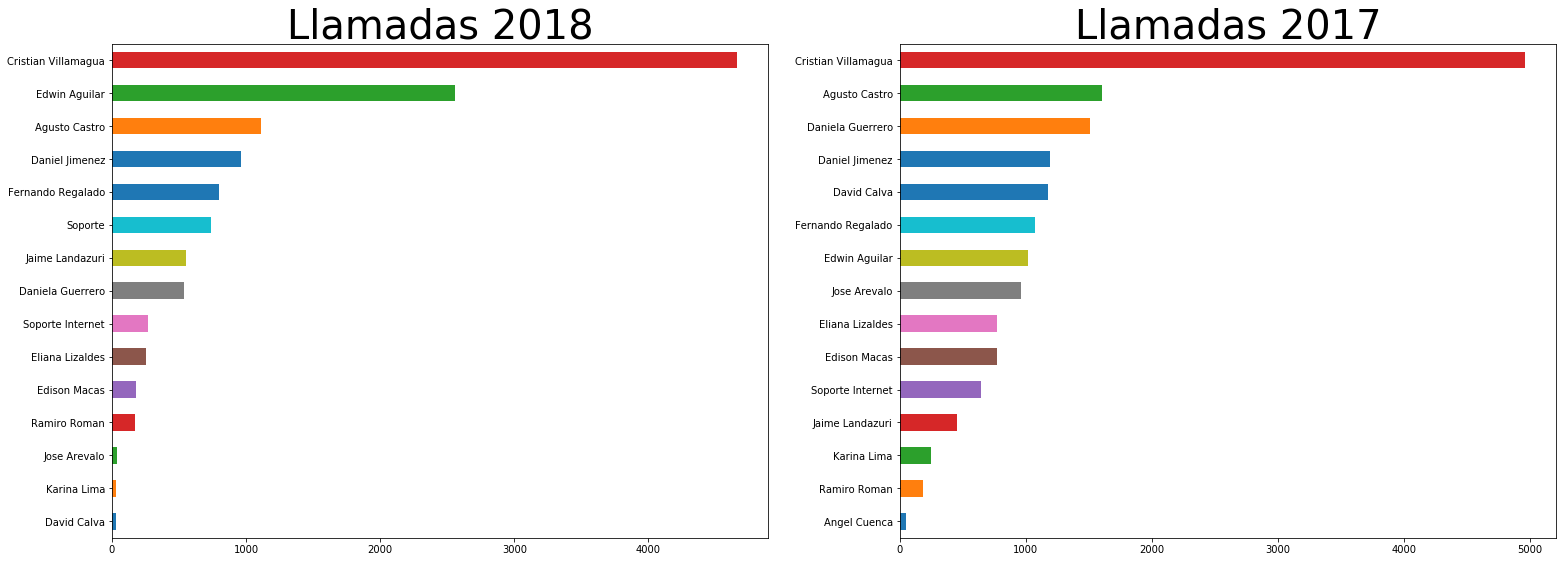

In [13]:
plt.figure(figsize=(40,20))
plt.subplot2grid((2,3), (0,0))
result.Usuario[result['Anio']==2018].value_counts()[:15].sort_values(inplace=False).plot('barh');
plt.title('Llamadas 2018', fontsize = 40)
plt.subplot2grid((2,3), (0,1))
result.Usuario[result['Anio']==2017].value_counts()[:15].sort_values(inplace=False).plot('barh');
plt.title('Llamadas 2017', fontsize = 40)
plt.show()


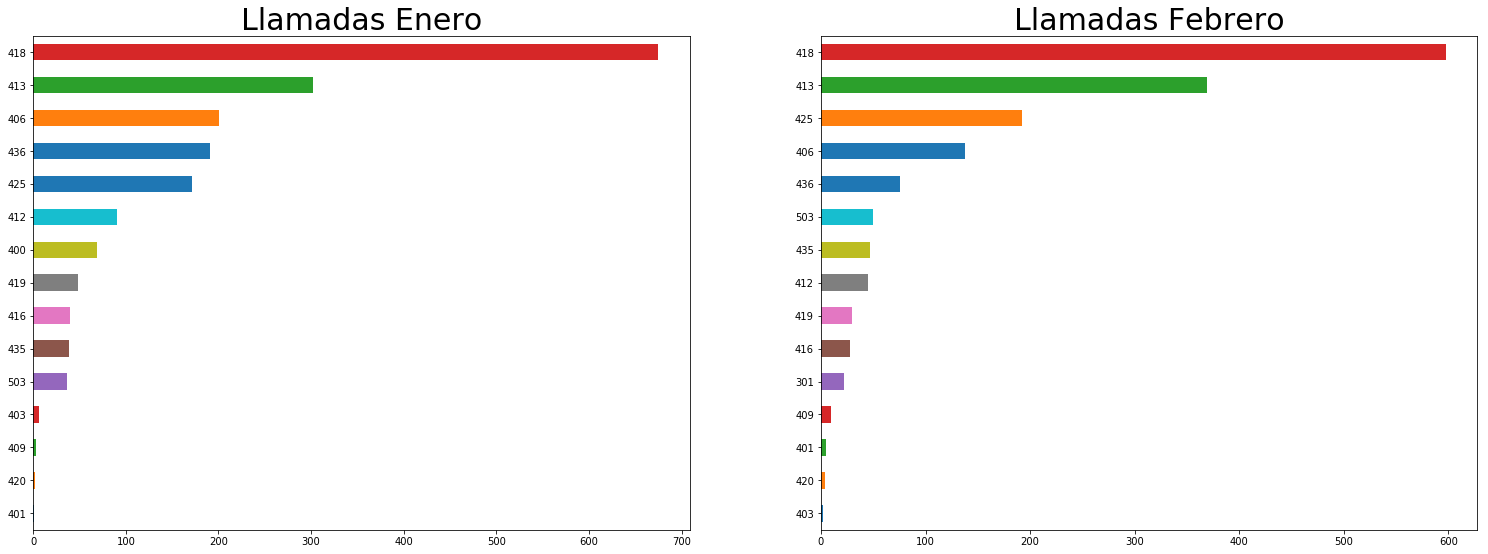

In [14]:
plt.figure(figsize=(40,20))
plt.subplot2grid((2,3), (0,0))
result.Fuente_llamada[result['MES']==1].value_counts()[:15].sort_values(inplace=False).plot('barh');
plt.title('Llamadas Enero', fontsize = 30)
plt.subplot2grid((2,3), (0,1))
result.Fuente_llamada[result['MES']==2].value_counts()[:15].sort_values(inplace=False).plot('barh');
plt.title('Llamadas Febrero', fontsize = 30)
plt.show()

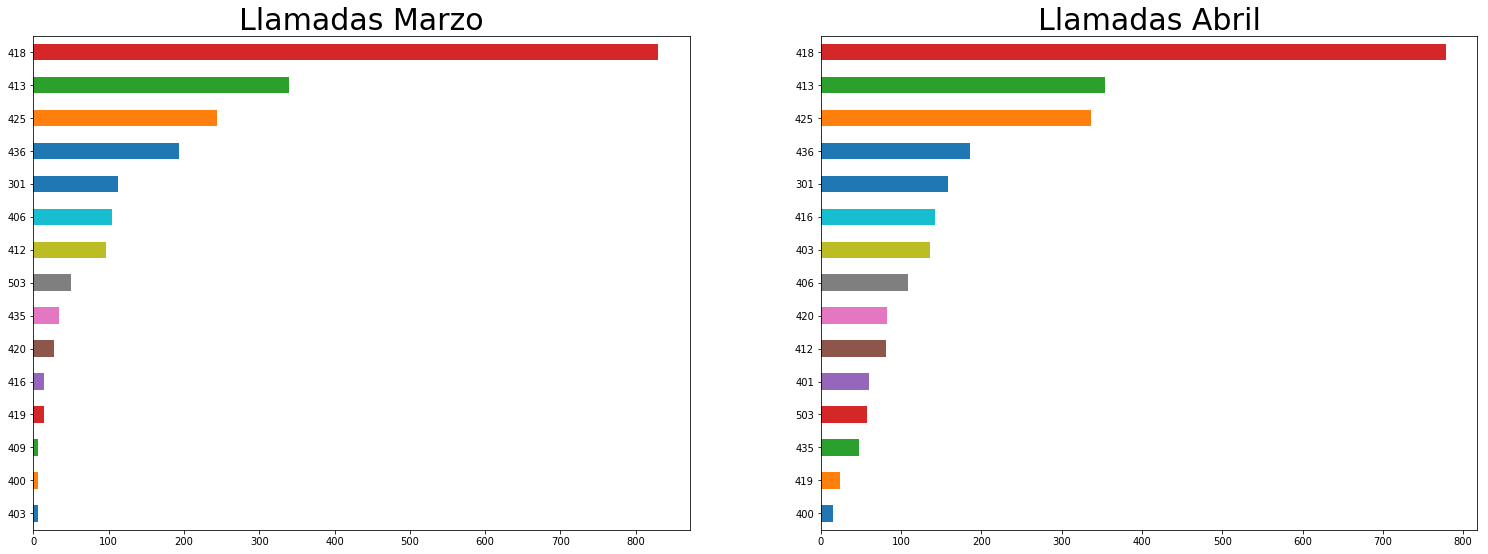

In [15]:
plt.figure(figsize=(40,20))
plt.subplot2grid((2,3), (0,0))
result.Fuente_llamada[result['MES']==3].value_counts()[:15].sort_values(inplace=False).plot('barh');
plt.title('Llamadas Marzo', fontsize = 30)
plt.subplot2grid((2,3), (0,1))
result.Fuente_llamada[result['MES']==4].value_counts()[:15].sort_values(inplace=False).plot('barh');
plt.title('Llamadas Abril', fontsize = 30)
plt.show()

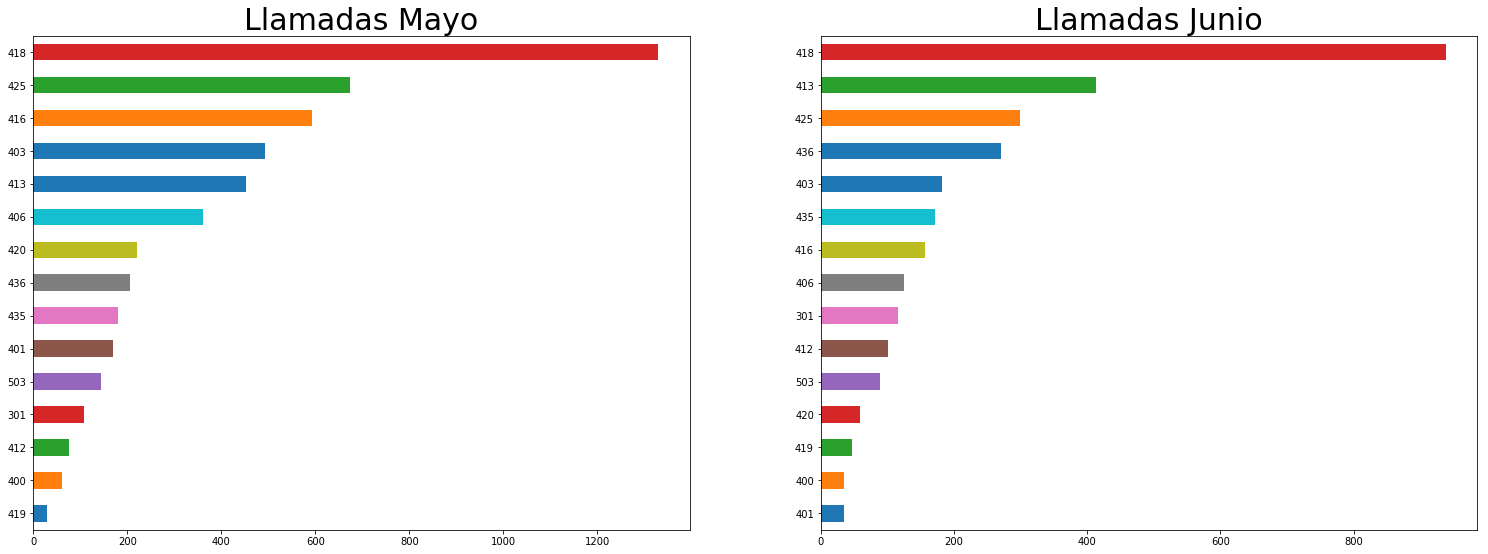

In [16]:
plt.figure(figsize=(40,20))
plt.subplot2grid((2,3), (0,0))
result.Fuente_llamada[result['MES']==5].value_counts()[:15].sort_values(inplace=False).plot('barh');
plt.title('Llamadas Mayo', fontsize = 30)
plt.subplot2grid((2,3), (0,1))
result.Fuente_llamada[result['MES']==6].value_counts()[:15].sort_values(inplace=False).plot('barh');
plt.title('Llamadas Junio', fontsize = 30)
plt.show()

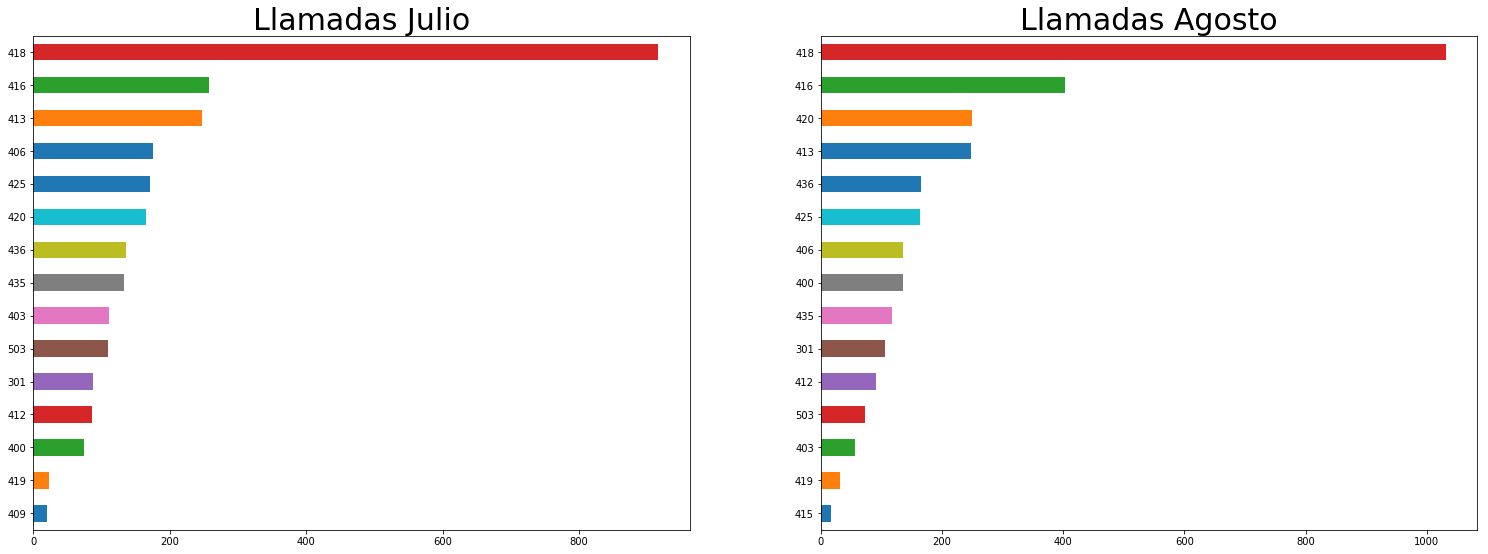

In [17]:
plt.figure(figsize=(40,20))
plt.subplot2grid((2,3), (0,0))
result.Fuente_llamada[result['MES']==7].value_counts()[:15].sort_values(inplace=False).plot('barh');
plt.title('Llamadas Julio', fontsize = 30)
plt.subplot2grid((2,3), (0,1))
result.Fuente_llamada[result['MES']==8].value_counts()[:15].sort_values(inplace=False).plot('barh');
plt.title('Llamadas Agosto', fontsize = 30)
plt.show()

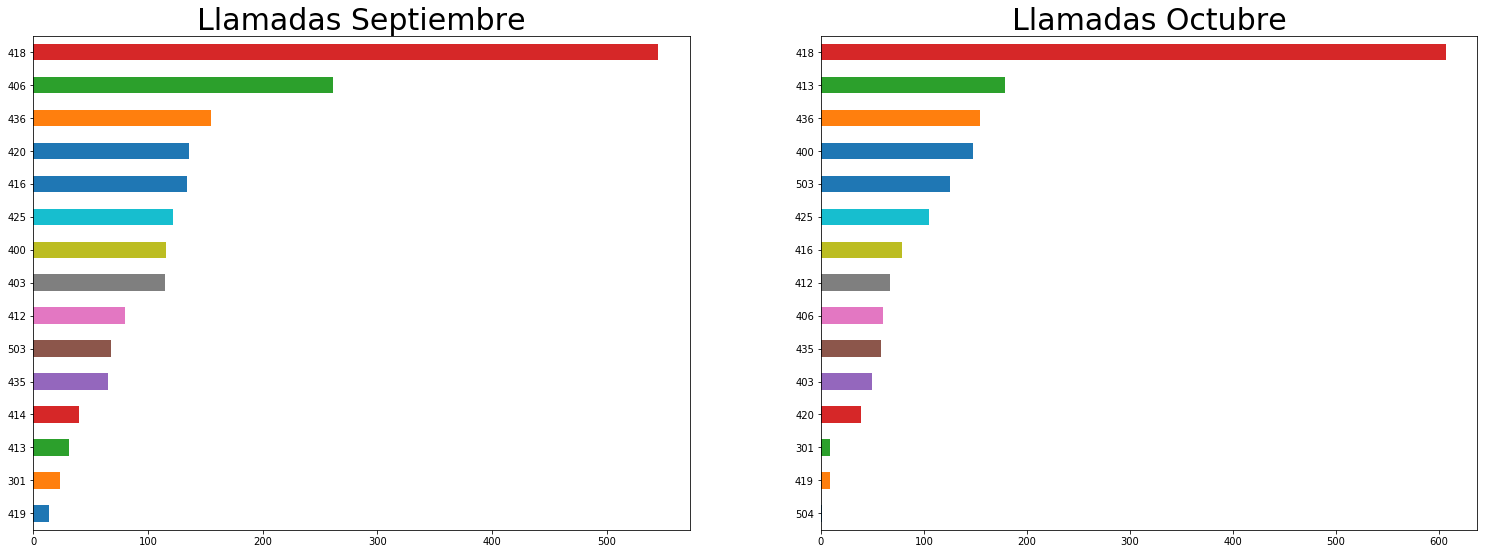

In [18]:
plt.figure(figsize=(40,20))
plt.subplot2grid((2,3), (0,0))
result.Fuente_llamada[result['MES']==9].value_counts()[:15].sort_values(inplace=False).plot('barh');
plt.title('Llamadas Septiembre', fontsize = 30)
plt.subplot2grid((2,3), (0,1))
result.Fuente_llamada[result['MES']==10].value_counts()[:15].sort_values(inplace=False).plot('barh');
plt.title('Llamadas Octubre', fontsize = 30)
plt.show()

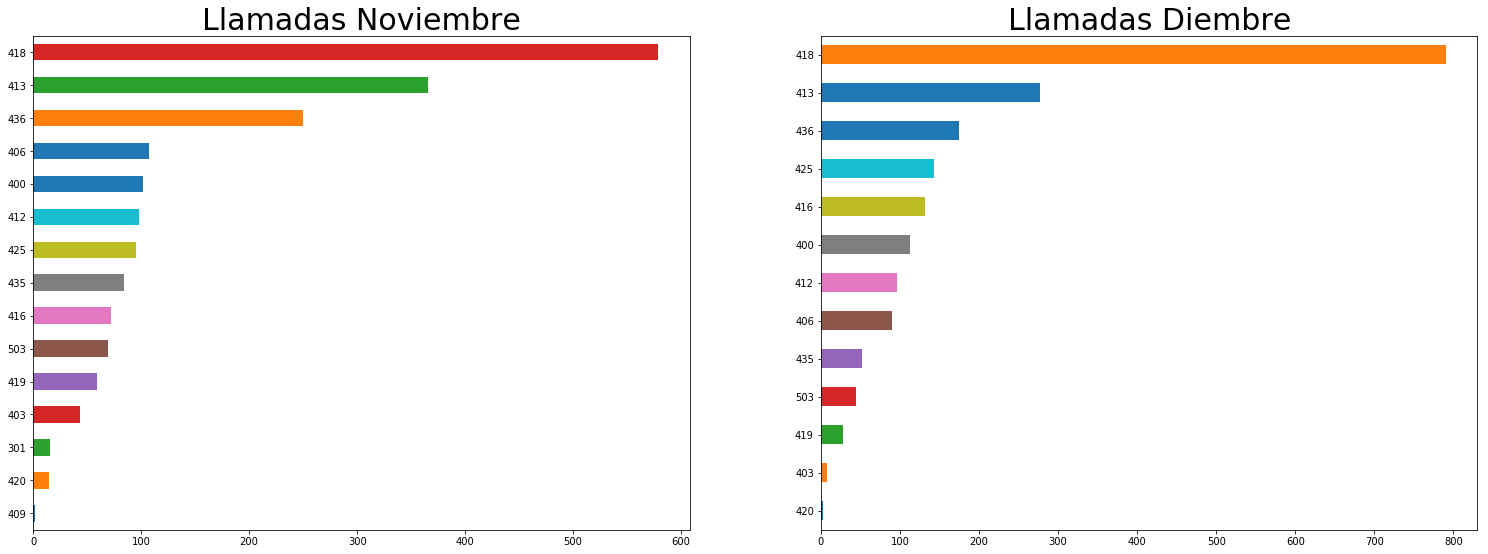

In [19]:
plt.figure(figsize=(40,20))
plt.subplot2grid((2,3), (0,0))
result.Fuente_llamada[result['MES']==11].value_counts()[:15].sort_values(inplace=False).plot('barh');
plt.title('Llamadas Noviembre', fontsize = 30)
plt.subplot2grid((2,3), (0,1))
result.Fuente_llamada[result['MES']==12].value_counts()[:15].sort_values(inplace=False).plot('barh');
plt.title('Llamadas Diembre', fontsize = 30)
plt.show()

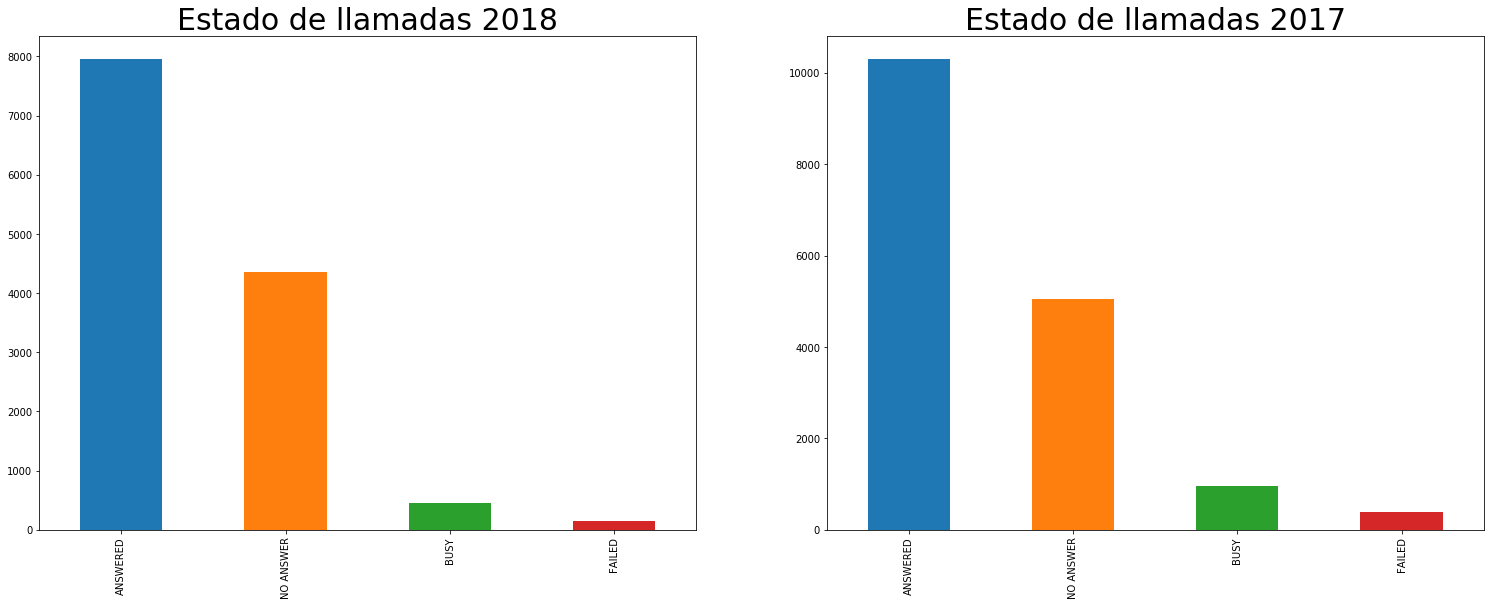

In [20]:
#result.sort_values(by='Fuente_llamada', ascending=False))
plt.figure(figsize=(40,20))
plt.subplot2grid((2,3), (0,0))
result.Estado_llamada[result['Anio']==2018].value_counts().plot(kind='bar');
plt.title('Estado de llamadas 2018', fontsize = 30)
plt.subplot2grid((2,3), (0,1))
result.Estado_llamada[result['Anio']==2017].value_counts().plot(kind='bar');
plt.title('Estado de llamadas 2017', fontsize = 30)
plt.show()

In [21]:
import sqlite3
connection = sqlite3.connect("central_ip.db")
connection.text_factory = str
result.to_sql(name='educativas', con=connection, if_exists = 'append', index=False)

In [22]:
result.keys()

Index([u'Fecha', u'Fuente_llamada', u'Destino_llamada', u'Canal_Origen',
       u'Canal_Destino', u'Estado_llamada', u'Duracion', u'Departamento',
       u'Usuario', u'Anio', u'MES'],
      dtype='object')

In [26]:
result.dtypes

Fecha              object
Fuente_llamada      int64
Destino_llamada     int64
Canal_Origen       object
Canal_Destino      object
Estado_llamada     object
Duracion           object
Departamento       object
Usuario            object
Anio                int64
MES                 int64
dtype: object

In [24]:
result = pd.read_sql_query("SELECT * from educativas", connection)

In [25]:
result

,Fecha,Fuente_llamada,Destino_llamada,Canal_Origen,Canal_Destino,Estado_llamada,Duracion,Departamento,Usuario,Anio,MES
0,2018-09-04 16:30:33,413,994439133,SIP/413-0000053b,SIP/1001-0000053c,ANSWERED,125s (2m 5s),Departamento Tecnico,Edwin Aguilar,2018,9
1,2018-09-04 16:25:36,413,994439133,SIP/413-00000534,SIP/1001-00000535,NO ANSWER,0s,Departamento Tecnico,Edwin Aguilar,2018,9
2,2018-09-04 16:08:17,413,996922067,Local/0996922067@from-internal-0000003c;2,SIP/1001-00000531,NO ANSWER,0s,Departamento Tecnico,Edwin Aguilar,2018,9
3,2018-09-04 16:07:53,413,416,SIP/413-0000052f,SIP/416-00000530,NO ANSWER,0s,Departamento Tecnico,Edwin Aguilar,2018,9
4,2018-09-04 10:20:12,413,412,SIP/413-000004bc,SIP/412-000004bd,ANSWERED,23s,Departamento Tecnico,Edwin Aguilar,2018,9
5,2018-09-03 17:14:26,413,986702083,SIP/413-0000047b,SIP/1001-0000047c,ANSWERED,40s,Departamento Tecnico,Edwin Aguilar,2018,9
6,2018-09-03 16:31:06,413,986665677,SIP/413-00000471,SIP/1001-00000472,ANSWERED,40s,Departamento Tecnico,Edwin Aguilar,2018,9
7,2018-09-03 14:42:19,413,985651938,SIP/413-00000444,SIP/1001-00000445,ANSWERED,52s,Departamento Tecnico,Edwin Aguilar,2018,9
8,2018-09-03 11:57:57,413,412,SIP/413-00000420,SIP/412-00000421,ANSWERED,55s,Departamento Tecnico,Edwin Aguilar,2018,9
9,2018-09-01 12:56:15,413,416,SIP/413-000003cf,SIP/416-000003d0,ANSWERED,104s (1m 44s),Departamento Tecnico,Edwin Aguilar,2018,9
